In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

In [2]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


In [3]:
df = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
310583,2016-03-31 11:50:23,VW_GOLF_PLUS_1.9_TDI_EURO_4_77KW=105PS.1_HAND,privat,Angebot,3350,control,limousine,2005,manuell,105,golf,150000,9,diesel,volkswagen,ja,2016-03-31 00:00:00,0,44793,2016-04-02 06:46:09
288585,2016-03-08 03:59:28,Mercedes_Benz_Typ_B_200_CDI_BlueEFFICIENCY_Spo...,privat,Angebot,16500,control,bus,2012,manuell,136,b_klasse,150000,6,diesel,mercedes_benz,nein,2016-03-08 00:00:00,0,45549,2016-04-05 17:46:27
261292,2016-04-04 11:56:45,BMW_318d_Luxury_Line,privat,Angebot,20900,control,limousine,2012,manuell,143,3er,80000,7,diesel,bmw,nein,2016-04-04 00:00:00,0,4177,2016-04-04 11:56:45
75680,2016-04-02 15:25:23,Opel_Astra_GTC_1.6_Edition,privat,Angebot,3680,test,limousine,2005,manuell,105,astra,150000,4,benzin,opel,nein,2016-04-02 00:00:00,0,65207,2016-04-03 21:12:00
95005,2016-03-12 20:46:56,Fiat_Grande_Punto_1_4,privat,Angebot,3250,test,kleinwagen,2006,manuell,77,punto,90000,3,benzin,fiat,nein,2016-03-12 00:00:00,0,38268,2016-03-21 03:16:37
192191,2016-03-11 00:55:06,BMW_325i,privat,Angebot,2400,test,limousine,2001,automatik,192,3er,150000,9,benzin,bmw,nein,2016-03-10 00:00:00,0,14929,2016-03-25 03:17:13
101729,2016-04-03 23:36:23,MINI_Mini_Cooper_S,privat,Angebot,8900,control,kleinwagen,2007,manuell,174,cooper,150000,2,benzin,mini,nein,2016-04-03 00:00:00,0,26188,2016-04-06 08:16:50
288023,2016-03-05 21:55:11,Bmw_320d_Touring,privat,Angebot,0,test,kombi,2000,manuell,136,3er,150000,8,diesel,bmw,nein,2016-03-05 00:00:00,0,49835,2016-03-07 08:16:31
315729,2016-04-05 12:53:53,Audi_A6_Avant_2.4,privat,Angebot,13999,test,kombi,2007,manuell,177,a6,150000,5,benzin,audi,nein,2016-04-05 00:00:00,0,2827,2016-04-05 12:53:53
360416,2016-03-10 16:48:08,Golf4_mit_Klima,privat,Angebot,950,control,limousine,1999,manuell,75,golf,150000,2,benzin,volkswagen,NaN,2016-03-10 00:00:00,0,53773,2016-03-15 08:46:49


In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
print(df.seller.unique())
print(df.offerType.unique())
print(df.abtest.unique())
print(df.nrOfPictures.unique())

[u'privat' u'gewerblich']
[u'Angebot' u'Gesuch']
[u'test' u'control']
[0]


In [6]:
df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)


In [7]:
print("Too new: %d" % df.loc[df.yearOfRegistration >= 2017].count()['name'])

Too new: 14680


In [8]:
print("Vehicle types: " , df['vehicleType'].unique())
print("Brands: " , df['brand'].unique())

('Vehicle types: ', array([nan, u'coupe', u'suv', u'kleinwagen', u'limousine', u'cabrio',
       u'bus', u'kombi', u'andere'], dtype=object))
('Brands: ', array([u'volkswagen', u'audi', u'jeep', u'skoda', u'bmw', u'peugeot',
       u'ford', u'mazda', u'nissan', u'renault', u'mercedes_benz', u'opel',
       u'seat', u'citroen', u'honda', u'fiat', u'mini', u'smart',
       u'hyundai', u'sonstige_autos', u'alfa_romeo', u'subaru', u'volvo',
       u'mitsubishi', u'kia', u'suzuki', u'lancia', u'porsche', u'toyota',
       u'chevrolet', u'dacia', u'daihatsu', u'trabant', u'saab',
       u'chrysler', u'jaguar', u'daewoo', u'rover', u'land_rover', u'lada'], dtype=object))


In [9]:
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

In [10]:
dedups = dedups[
        (dedups.yearOfRegistration <= 2016)
    &   (dedups.yearOfRegistration >= 1950)
    &   (dedups.price >= 10)
    &   (dedups.price <= 150000)
    &   (dedups.powerPS >= 10)
    &   (dedups.powerPS <= 500)
]

In [11]:
print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['name'].count() / df['name'].count()))

-----------------
Data kept for analisys: 81 percent of the entire set
-----------------


In [12]:
dedups.isnull().sum()

name                       0
price                      0
vehicleType            10908
yearOfRegistration         0
gearbox                 5328
powerPS                    0
model                  11386
kilometer                  0
monthOfRegistration        0
fuelType               15497
brand                      0
notRepairedDamage      42328
dtype: int64

In [13]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)

In [14]:
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

In [15]:
dedups.isnull().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [16]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']


gearbox
manuell         232407
automatik        66896
not-declared      5328
Name: gearbox, dtype: int64


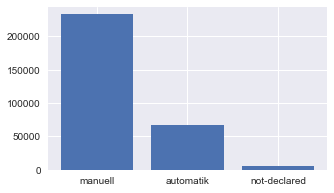

model
golf            24884
andere          21772
3er             17717
not-declared    11386
polo            10521
Name: model, dtype: int64


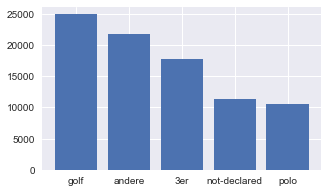

brand
volkswagen       64948
bmw              34460
opel             31856
mercedes_benz    29567
audi             27996
Name: brand, dtype: int64


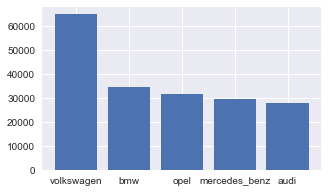

vehicleType
limousine     84910
kleinwagen    68677
kombi         59906
bus           26993
cabrio        20925
Name: vehicleType, dtype: int64


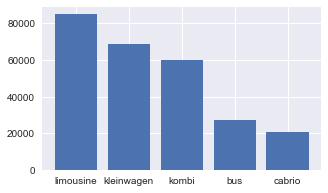

fuelType
benzin          190294
diesel           93323
not-declared     15497
lpg               4646
cng                475
Name: fuelType, dtype: int64


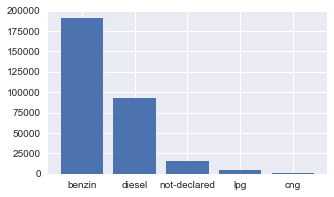

notRepairedDamage
nein            233790
not-declared     42328
ja               28513
Name: notRepairedDamage, dtype: int64


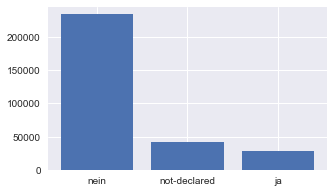

In [17]:
for i, c in enumerate(categories):
    v = dedups[c].unique()
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))
    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head())
    plt.xticks(r, g.index)
    plt.show()

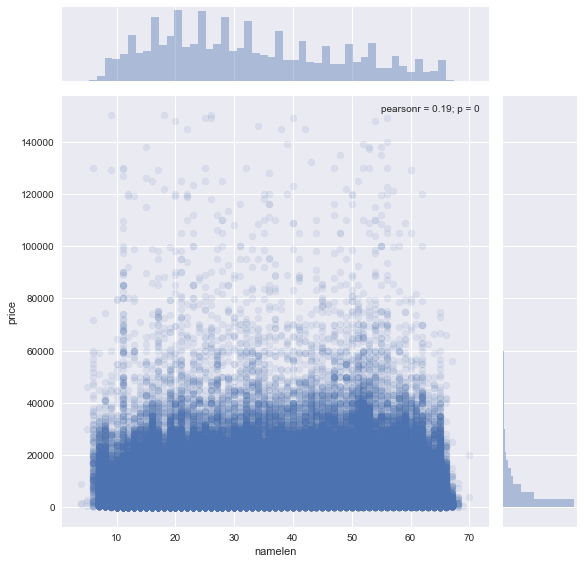

In [18]:
dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]
ax = sns.jointplot(x='namelen', y='price',data=dedups[['namelen', 'price']], alpha=0.1, size=8)
plt.show()

In [19]:
labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen'] 
                    + [x+"_feat" for x in labels]]

In [20]:
labeled.head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,name_feat,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
1,18300,2011,190,125000,5,20,2864,1,0,163,1,3,3
2,9800,2004,163,125000,8,30,74014,0,2,119,14,3,8
3,1500,2001,75,150000,6,18,63284,1,1,118,38,1,4
4,3600,2008,69,90000,7,30,139445,1,1,103,31,3,4
5,650,1995,102,150000,10,50,22554,1,0,11,2,1,6


In [21]:
print float(len(labeled['name_feat'].unique())) / float(len(labeled['name_feat']))


0.622648384439


In [22]:
labeled.drop(['name_feat'], axis='columns', inplace=True)

/Users/zengfanchen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


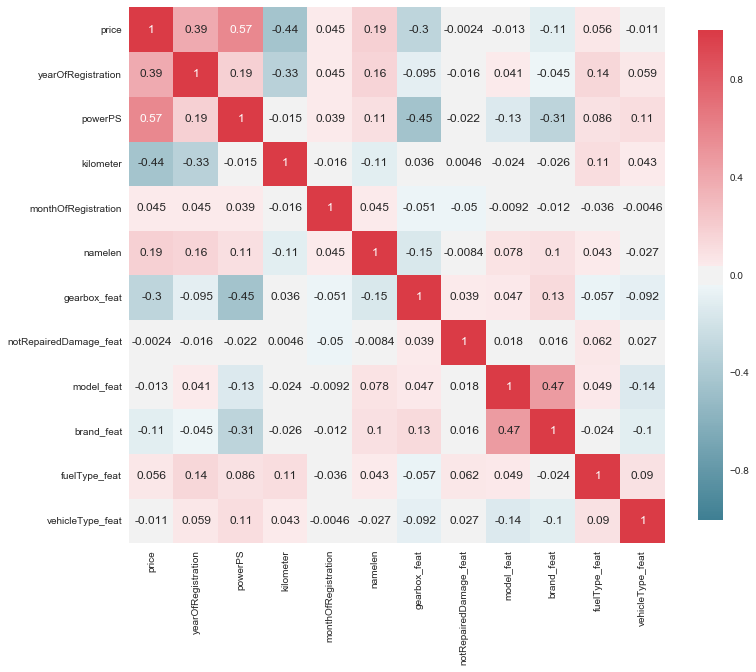

In [23]:
plot_correlation_map(labeled)
plt.show()

In [24]:
labeled.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
price,1.000000,0.385529,0.573211,-0.443937,0.045310,0.186216,-0.298132,-0.002397,-0.012696,-0.105721,0.055631,-0.011078
yearOfRegistration,0.385529,1.000000,0.187319,-0.333278,0.044808,0.158631,-0.095435,-0.015697,0.040744,-0.044886,0.141687,0.058999
powerPS,0.573211,0.187319,1.000000,-0.015251,0.039156,0.106443,-0.447563,-0.022458,-0.132990,-0.310216,0.086000,0.112032
kilometer,-0.443937,-0.333278,-0.015251,1.000000,-0.016143,-0.105846,0.035539,0.004584,-0.023764,-0.026457,0.114572,0.043035
monthOfRegistration,0.045310,0.044808,0.039156,-0.016143,1.000000,0.044614,-0.050605,-0.050345,-0.009236,-0.012394,-0.036456,-0.004590
namelen,0.186216,0.158631,0.106443,-0.105846,0.044614,1.000000,-0.150716,-0.008438,0.078338,0.099701,0.043345,-0.026740
gearbox_feat,-0.298132,-0.095435,-0.447563,0.035539,-0.050605,-0.150716,1.000000,0.039206,0.047128,0.125740,-0.056520,-0.091776
notRepairedDamage_feat,-0.002397,-0.015697,-0.022458,0.004584,-0.050345,-0.008438,0.039206,1.000000,0.017841,0.016489,0.062289,0.027165
model_feat,-0.012696,0.040744,-0.132990,-0.023764,-0.009236,0.078338,0.047128,0.017841,1.000000,0.471876,0.049120,-0.136108
brand_feat,-0.105721,-0.044886,-0.310216,-0.026457,-0.012394,0.099701,0.125740,0.016489,0.471876,1.000000,-0.023702,-0.102546


In [25]:
labeled.corr().loc[:, 'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.573211
kilometer                 0.443937
yearOfRegistration        0.385529
gearbox_feat              0.298132
namelen                   0.186216
brand_feat                0.105721
fuelType_feat             0.055631
monthOfRegistration       0.045310
model_feat                0.012696
vehicleType_feat          0.011078
notRepairedDamage_feat    0.002397
Name: price, dtype: float64

In [26]:
Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)

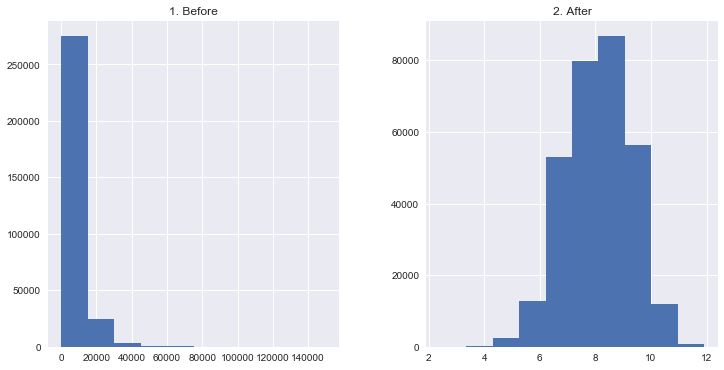

In [27]:
matplotlib.rcParams['figure.figsize'] = (12., 6.)
prices = pd.DataFrame({"1. Before": Y, "2. After": np.log1p(Y)})
prices.hist()
plt.show()
Y = np.log1p(Y)


In [28]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LarsCV, LassoLarsCV

from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5))
    return r

test_size = .33

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state=3)

print X_train.shape, X_val.shape, y_train.shape, y_val.shape

r = range(2003, 2017)
km_year = 10000
    

(204102, 11) (100529, 11) (204102,) (100529,)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min finished


In [ ]:
print gs.best_score_
print gs.best_params_

0.820968622299
{'min_samples_split': 3, 'n_estimators': 500, 'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3}


In [ ]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion']
                               , min_samples_leaf=bp['min_samples_leaf']
                               , min_samples_split=bp['min_samples_split']
                               , max_depth=bp['max_depth']
                               , n_estimators=bp['n_estimators'])

forest.fit(X_train, y_train)
print('Score: %.2f' % forest.score(X_val, y_val))



In [ ]:
importances = forest.feature_importances_

In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
print "Feature ranking:"

for f in xrange(X.shape[1]):
    print("%d. feature %d (%f)" %(f+1, indices[f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1])
        , importances[indices]
        , color="r", yerr=std[indices]
        , align="center"
        , tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
pwd